# Practical Session 2: Basic Data Manipulation with Python - Titanic Project

![Some text here](https://www.encyclopedia-titanica.org/images/titanic-fp-southampton-banner1.jpg)

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date.

We will work with real data from the first -and last- voyge of the Titanic, to discover what really happened to the people who sailed on RMS Titanic.

For this project, you should work with your team for some time, then we will share the results with the class.

You can find some more info about the people who sailed on the Titanic here:

https://www.encyclopedia-titanica.org/

Also, the Titanic data is one of the introductory competitions of Kaggle. If you feel like trying to participate you can find the data description below:

https://www.kaggle.com/c/titanic/data

## First things first - show me the data

The data we will work with comprises of information about all the people who sailed with titanic. It is given as a single comma separated values file.

In [1]:
import pandas as pd
titanic = pd.read_csv("TitanicData.csv")

Let's see what we loaded

In [2]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note that some values are null. We might need to deal with this at some point. Some columns are categorical / string etc (see the "object" ones).

## Exploration

<font color="blue">Describe the numerical columns</font>

In [4]:
# Your Code Here

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color="blue">Make a histogram of the Age of the passengers travelling in the Titanic. Use 15 bins, and change the color of the plot to your liking.</font>

>Hint: have a look at the matplotlib's `plt.hist()` function, or the pandas' `Series.plot.hist()`

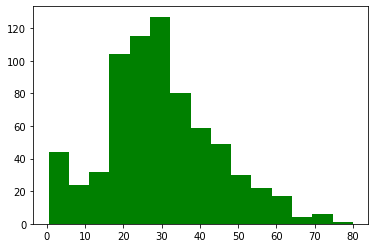

<AxesSubplot:ylabel='Frequency'>

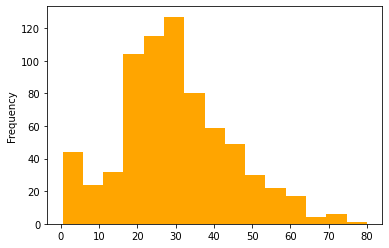

In [5]:
#Your Code Here

# Using Matplotlib
import matplotlib.pyplot as plt

titanicValidAge = titanic[titanic["Age"].notna()] # Remove rows that have no valid Age

plt.hist(titanicValidAge["Age"], bins = 15, color = 'green')
plt.show()

# Directly using pandas
titanic["Age"].plot.hist(bins = 15, color = "orange")

<font color="blue">Do the same with the fares, then find out what is the value at the 75% percentile (i.e. find the fare X that splits the titanic passengers in two parts: 75% of the passengers paid less than X and 25% paid more)</font>

>Hint: Have a look at the pandas function `Series.quantile()`

Fare at the 75% Percentile:  31.0


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

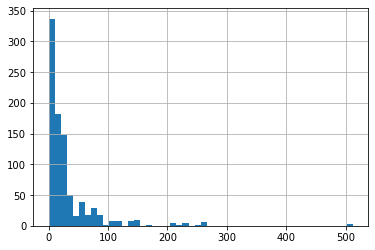

In [6]:
#Your Code Here

titanic["Fare"].hist(bins = 50)
FareAt75 = titanic["Fare"].quantile(0.75)
print("Fare at the 75% Percentile: ", FareAt75)

#Alternatively
titanic["Fare"].describe()

## Surviving the Titanic

<font color="blue">What was the chance of surviving of someone who paid more than 100 GBP for their ticket?</font>

In [7]:
# Your Code Here

richFare = 100

richPeople = titanic[(titanic["Fare"] >= richFare)]

howManyRich = len(richPeople) # Alternatively: richPeople.count()[0]
howManyRichSurvived = sum(richPeople["Survived"]) # Alternatively: richPeople["Survived"].sum()
print("Percentage of rich people survived: ", howManyRichSurvived/howManyRich)


poorPeople = titanic[(titanic["Fare"] < richFare)]

howManyPoor = len(poorPeople)
howManyPoorSurvived = sum(poorPeople["Survived"])
print("Percentage of poor people survived: ", howManyPoorSurvived/howManyPoor)

Percentage of rich people survived:  0.7358490566037735
Percentage of poor people survived:  0.3615751789976134


<font color="blue">**Exercise:** Make a function that given a fare value of F calculates what percentage of people survived who had paid F or less. Use this function to plot the rate of survival against the fare paid for the fairs up until the 0.75 quantile (75% percentile)</font>

In [8]:
#Your Code here

def probSurvival(maxFarePaid):
    paidBelowFare = titanic[(titanic["Fare"] <= maxFarePaid)]

    howMany = len(paidBelowFare)
    howManySurvived = sum(paidBelowFare["Survived"])
    return  howManySurvived/howMany

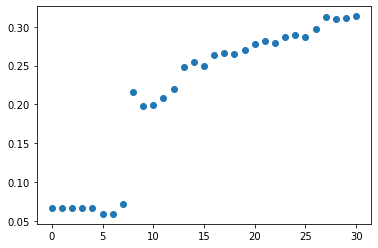

In [9]:
import numpy as np

fareRange = np.arange(titanic["Fare"].min(), titanic["Fare"].quantile(0.75))

survived = [probSurvival(fare) for fare in fareRange]

plt.plot(fareRange, survived, "o")

## Modelling our data

<font color="blue">**Exercise:** Have a look at your plot and explain how you could model this. Then make a model, using regression and gradient descent, and use your model to predict what is the chance of survival of someone who had paid 20.5 USD</font>

---

*ANSWER*

We could try different models, but looking at the plot we obtained, it seems like there are two distinctly different domains. People who paid less that ~8 USD had practically no chance of survival - they might be specific holders of 3rd class tickets with no access to the saving boats. No matter the reason, it seems they did not even consider them. From then onwards, there seems to be a correlation between the fare paid and the chance of being rescued. The relation seems linear, so we can try with a linear model, but we will also try with a polynomial, just to have a comparison.

---

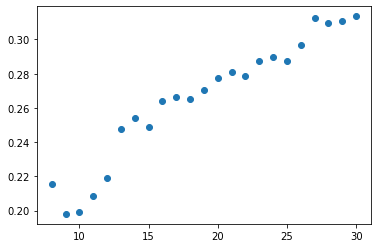

In [28]:
# Your Code Here

# First, we will select the data we will be using. 
# There are many ways, but we will use a mask to index into the fareRange and survived lists. 
# To do that we will also convert survived into a numpy array

mask = fareRange >= 8
x = fareRange[mask] # Our only feature
y = np.array(survived)[mask] # Our target output

plt.plot(x, y, "o")
plt.show()

In [29]:
# Your code here (cont)

# Now, we will redefine necessary functions (copied from Problems 6)

# Feature mapping
def map_feature(x, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a design matrix (samples in rows, features in columns) where the feature columns comprise
    1, x, x^2, x^3, ..., x^degree
    '''
    
    x = x.reshape(-1, 1) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    
    DesignMatrix = np.ones_like(x) # start with a column of ones
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

# the latest version of gradient descent with regularisation)
def GradientDescent_np_withReg(X, y, max_iterations=100, alpha=1, lam = 1):
    '''
    Performs gradient descent with regularisation
    X: design matrix
    y: target values
    alpha: learning rate
    lam: regularisation coefficient
    Returns a list of weights and the list of costs per iteration
    '''
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        w_copy = w.copy()
        w_copy[0] = 0 # ignore the bias term in the regularisation
        grad = (np.dot(X.T , (np.dot(X, w) - y)) + 2 * lam * w_copy)/ m;
        w = w - alpha*grad
        J[iteration] = (sum( (np.dot(X, w) - y)**2) + lam * sum(np.dot(w_copy.transpose(), w_copy))) / m        
    return [w, J]

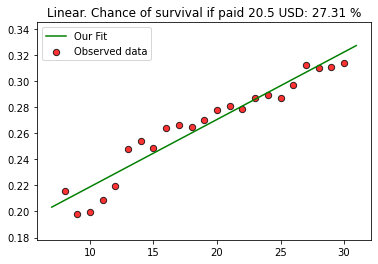

Final loss:  9.213334165344817e-05


In [47]:
# Your code here (cont)

# First, let's apply a linear model. We will use the map_feature function anyway, to take advantage of the normalisation

x_norm, means, stds = map_feature(x, degree = 1) # Generate features up to the corresponding degree

w, J = GradientDescent_np_withReg(x_norm, y, alpha = 0.1, max_iterations=5000, lam = 0) # run our Gradient Descent

# plot our FIT
x_plot = np.arange(min(x)-1, max(x)+1, 0.05)
x_out, means, stds = map_feature(x_plot, degree = 1, preCalcMeans=means, preCalcStd=stds)
y_out = np.dot(x_out, w)
plt.plot(x_plot, y_out, color='green', label='Our Fit')

#plot the data
plt.scatter(x, y, s=40, c='red', edgecolor = 'k', linewidth = 1, label='Observed data', alpha = 0.8)

plt.legend() # Show a legend, with all the "labels" we have provided
plt.ylim(0.9 * min(y), 1.1 * max(y))

# Calculate number of accidents for 20.5 USD
x_out, means, stds = map_feature(np.array([20.5]), degree = 1, preCalcMeans=means, preCalcStd=stds) # this function expects a list of numbers as inputs, so we give it a list of a single number
y_out = np.dot(x_out, w)

# Add a title to our subplot that explains what it is
plt.title('Linear. Chance of survival if paid 20.5 USD: {} %'.format('%.2f' % (100*y_out[0]) ) )
plt.show()

print("Final loss: ", J[-1])

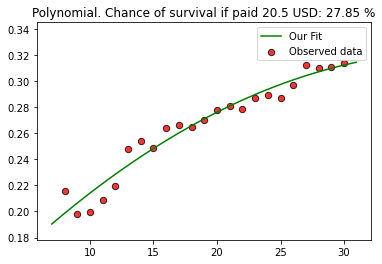

Final loss:  6.615031181907473e-05


In [50]:
# Your code here (cont)

# Now let's also try with a polynomial of degree 2 (you can change the degree to explore more possibilities).
deg = 2

x_norm, means, stds = map_feature(x, degree = deg) # Generate features up to the corresponding degree

w, J = GradientDescent_np_withReg(x_norm, y, alpha = 0.1, max_iterations=5000, lam = 0) # run our Gradient Descent

# plot our FIT
x_plot = np.arange(min(x)-1, max(x)+1, 0.05)
x_out, means, stds = map_feature(x_plot, degree = deg, preCalcMeans=means, preCalcStd=stds)
y_out = np.dot(x_out, w)
plt.plot(x_plot, y_out, color='green', label='Our Fit')

#plot the data
plt.scatter(x, y, s=40, c='red', edgecolor = 'k', linewidth = 1, label='Observed data', alpha = 0.8)

plt.legend() # Show a legend, with all the "labels" we have provided
plt.ylim(0.9 * min(y), 1.1 * max(y))

# Calculate number of accidents for 20.5 USD
x_out, means, stds = map_feature(np.array([20.5]), degree = deg, preCalcMeans=means, preCalcStd=stds) # this function expects a list of numbers as inputs, so we give it a list of a single number
y_out = np.dot(x_out, w)

# Add a title to our subplot that explains what it is
plt.title('Polynomial. Chance of survival if paid 20.5 USD: {} %'.format('%.2f' % (100*y_out[0]) ) )
plt.show()

print("Final loss: ", J[-1])

---

*ANSWER (cont)*

Both a linear model and a polynomial model seem to do a fair job here, and their estimates are not very different. The polynomial model achieves better final weight, so we could choose the 2-degree model. Both models have converged (to double check this, you can try to increase the number of iterations and see that the final solution does not change).

---

## How much would it have cost me to travel first class?

<font color="blue">Add a column with the Fare value in todays GBP. take into account that 1 GBP of 1915 would be worth 114.97 GBP in 2020 (source: https://www.in2013dollars.com/uk/inflation/1915?amount=1) </font>

In [11]:
#Your Code Here

titanic["Fare2020"] = titanic["Fare"] * 114.97
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2020
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,833.532500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8195.441001
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,911.137250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,6104.907000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,925.508500


<font color="blue"> What are the key statistics for the fares in 2020 value of the different classes?</font>

>Hint: Have a look at the pandas `DataFrame.groupby()` function, and use `DataFrame.describe()` to get the key statistics

In [12]:
#Your Code Here

titanic.groupby("Pclass")["Fare2020"].describe()

# Alternatively, for a specific class:
# titanic[titanic["Pclass"] == 1]["Fare2020"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,9675.264422,9011.391443,0.0,3555.326532,6931.253875,10749.695,58902.488124
2,184.0,2375.531197,1542.598335,0.0,1494.610000,1638.322500,2989.220,8450.295000
3,491.0,1572.277995,1354.132952,0.0,891.017500,925.508500,1782.035,7996.163500


According to your statistics, what is the minimum price paid by someone travelling in each of the three classes? If you have done this right, you should see that there are passengers that have paid 0 in every class... This is a bit strange, and not good for our statistics. These were probably crew members.

<font color="blue">Print out the names of all passengers that paid 0 fare</font>

In [13]:
#Your Code Here

titanic[titanic["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2020
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0.0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0.0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0.0


<font color="blue"> Calculate again the key statistics for the fares in 2020 value of the different classes, but this time, removing any passengers that have paid a fare of 0.</font>

In [14]:
#Your Code Here

titanic[titanic["Fare"] != 0].groupby("Pclass")["Fare2020"].describe()

# Alternatively, for a specific class:
# titanic[(titanic["Pclass"] == 1) & (titanic["Fare"] != 0)]["Fare2020"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,211.0,9904.536091,8992.051452,574.850000,3783.708688,7125.748624,11492.688625,58902.488124
2,178.0,2455.605282,1504.171900,1207.185000,1494.610000,1727.182813,2989.220000,8450.295000
3,487.0,1585.191983,1352.129714,461.317125,891.017500,925.508500,1782.035000,7996.163500
